Atividade Prática Supervisionada - Entrega 4 - Teste de Hipótese
# ***ONU - Análise de Objetivo de Desenvolvimento Sustentável***
### **Teste de Blocos Econômicos e Desenvolvimento**

Integrantes:  
* Eduardo Mendes Vaz  
* João Lucas de Moraes Barros Cadorniga  

---

## **Introdução**  

Na primeira análise do desenvolvimento mundial em relação ao Objetivo de Desenvolvimento Sustentável IV da ONU — o de investimento e melhoria das oportunidades educacionais —, utilizamos o fator `Investimento Governamental em Educação, como % do PIB`¹ ao longo dos anos. Agora, com probabilidade e estatística, temos **o objetivo de analisar e classificar dois blocos econômicos** em relação a esses dados.  

## 1. Mercosul  

O primeiro bloco é o ***Mercado Comum do Sul***, um dos maiores do hemisfério sul. Ele surgiu em 1991 como um processo de integração regional, inicialmente entre Argentina, Brasil, Paraguai e Uruguai — hoje admitindo direitos a outras nações sul-americanas.

Desde sua criação com o Tratado de Assunção, seu maior foco foram alicerces de **desenvolvimento econômico** e democrático. No entanto, também vigoram acordos migratórios, trabalhistas, entre outros. O bloco surgiu principalmente pela proximidade geográfica, mas também pela convergência cultural e econômica.

**Principais benefícios do bloco²:**
1. Residência legal com igualdade de direitos;
2. Turismo sem passaporte;
3. Transferência de educação pelos países;

* **A diminuição ou até `isenção de barreiras tarifárias` sobre o comércio de bens.** Além de acordos facilitados entre os membros da considerada **quinta economia do mundo**.


## 2. União Européia

Analogamente, o outro bloco analisado é a ***União Europeia***, que é considerada um dos mais poderosos do mundo — tanto por possuir inúmeros grandes países como membros, quanto por sua longa história.

Composto por 27 países-membros, o grupo surgiu especialmente por proximidade geográfica no continente, como uma maneira de unir as economias da Europa pelo Tratado de Maastricht, em 1992. Apesar de **foco *econômico***, a UE tem grande **solidez em objetivos sustentáveis e sociais**.³

**Principais benefícios do bloco³**:
1. Livre circulação de pessoas sem visto;  
2. Acordos de diminuição de taxas e livre circulação de mercadorias;
3. Proteção conjunta dos países;

* **A participação no *maior mercado único do mundo*, com `moeda unificada, o Euro`, e serviços telefônicos e digitais unificados.**

  
¹ Fonte: [World Bank](https://databank.worldbank.org/reports.aspx?source=sustainable-development-goals-%28sdgs%29#)  
² Fonte: [Mercosul](https://www.mercosur.int/pt-br/beneficios-do-mercosul-rumo-aos-seus-28-anos/)  
³ Fonte: [European Union](https://european-union.europa.eu/priorities-and-actions/achievements_pt)

## **Análise Probabilística, Classificador e Conclusões**

Levando em considerações as probabilidades calculadas, criamos um ***sistema de classificação***:

* Probabilidade de ser bloco, dado avançado: `Mercosul 28.57% x 71.43% UE`
* Probabilidade de ser bloco, dado atrasado: `Mercosul 30% x 70% UE`

Assim, percebemos que nosso classificador terá um **problema**: ao mesmo que tempo que classificará países avançados como da UE — probabilidade dominante 71.43% —, também colocará países atrasados no bloco — probabilidade 70%.¹

Ou seja, ao alimentar os países do estudo, **todos serão classificados como membros da União Européia**.

Portanto podemos concluir que o indicador utilizado para análise é **enviesado**, pois não nos permite usá-lo para criar um classificador que *consiga distinguir os blocos*.

Apesar disso, os ***resultados de acurácia*** foram interessantes:
* Acertos **Mercosul: 0%**  
* Acertos **UE: 100%**
* Acertos **TOTAIS: 71.05%**

São explicadas pelo *viés do modelo*, que causou acerto completo da UE, mas claro, nenhum do Mercosul.

Por fim, conclui-se que esse indicador **não é um bom preditor para esses blocos econômicos** (o que não descarta sua importância na análise das ODEs, ele simplesmente não nos ajudou para criar um modelo entre esses blocos).

---
  
¹ Cálculos completos abaixo no PDF

***Observação***: Gráfico de distribuição disponível no **final do PDF**

# **Classificação dos Países & Probabilidades Iniciais**

#### ***Considerações:***

Para a análise do Mercosul, foram levados em consideração todos os países oficiais do Mercosul (ARG, BRA, PAR, URU), mais os estados associados (BOL, CHI, COL, EQU, GUI, PER, SUR), totalizando **11 países.**

*OBS: a Venezuela, por estar atualmente bloqueada do Mercosul, não foi levada em consideração.*

No estudo da UE, foram levados em consideração todos os **27 países** do bloco.


#### ***Observação:***

Para classificar os países de ambos blocos econômicos em **Avançados** ou **Atrasados**, criamos um `fator de comparação`, calculado pela mediana da porcentagem do PIB investido em educação nos anos analisados na 1ª entrega (2004 a 2018), e então tirada a média do período. Para ser considerado avançado, **a mediana do investimento de uma nação durante esses anos deve estar acima do fator**.¹


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

df = pd.read_csv('dados/API_SE.XPD.TOTL.GD.ZS_DS2_en_csv_v2_4411877.csv', skiprows=4)

#OBS: Venezuela está suspensa do Mercosur, portanto, não foi incluída no cálculo
mercosul = df[df['Country Name'].isin(['Uruguay', 'Argentina', 'Paraguay', 'Brazil', 'Bolivia', 'Chile', 'Peru', 'Colombia', 'Ecuador', 'Guyana', 'Suriname'])]
eu = df[df['Country Name'].isin(['Austria', 'Belgium', 'Bulgaria', 'Denmark', 'Finland', 'Germany', 'France', 'Greece', 'Ireland', 'Italy', 'Luxembourg', 'Netherlands', 'Portugal', 'Romania', 'Spain', 'Sweden', 'United Kingdom', 'Cyprus', 'Croatia', 'Czech Republic', 'Estonia', 'Hungary', 'Latvia', 'Lithuania', 'Malta', 'Poland', 'Slovakia', 'Slovenia'])]


# Fator foi calculado pela mediana da % do PIB investido em educação nos anos analisados na APS1 (2004 a 2018), e então
# calculada a média com todos os anos. O fator foi aplicado para que os valores de cada país fossem comparáveis.
# Acima do fator, o país é considerado avançado em relação a ODS, e, abaixo, é considerado atrasado.
fatorx = df[[str(i) for i in range(2004, 2019)]].median().mean() # ~ 4.15



# cria coluna chamada Avançado no dataframe mercosul com True se a mediana dos anos 2004 a 2018 for maior que fatorx
mercosul['Avançado'] = mercosul[[str(i) for i in range(2004, 2019)]].median(axis=1) > fatorx

# cria coluna chamada Avançado no dataframe eu com True se a mediana dos anos 2004 a 2018 for maior que fatorx
eu['Avançado'] = eu[[str(i) for i in range(2004, 2019)]].median(axis=1) > fatorx


# Probabilidades Condicionais
p_avancado_dado_mercosul = len(mercosul[mercosul['Avançado'] == True])/len(mercosul)
p_avancado_dado_eu = len(eu[eu['Avançado'] == True])/len(eu)
print(f'Probabilidade de país ser avançado, dado que faz parte do Mercosul: {p_avancado_dado_mercosul * 100 :.2f}%')
print(f'Probabilidade de país ser avançado, dado que faz parte da União Europeia: {p_avancado_dado_eu * 100 :.2f}%')

Probabilidade de país ser avançado, dado que faz parte do Mercosul: 72.73%
Probabilidade de país ser avançado, dado que faz parte da União Europeia: 74.07%


C:\Users\neodr\AppData\Local\Temp\ipykernel_4544\3636450969.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mercosul['Avançado'] = mercosul[[str(i) for i in range(2004, 2019)]].median(axis=1) > fatorx
C:\Users\neodr\AppData\Local\Temp\ipykernel_4544\3636450969.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eu['Avançado'] = eu[[str(i) for i in range(2004, 2019)]].median(axis=1) > fatorx


In [48]:
valores_merc = mercosul[[str(i) for i in range(2004, 2019)]].median(axis=1)
valores_eu = eu[[str(i) for i in range(2004, 2019)]].median(axis=1)

valores = (valores_merc,)

def func(sample):
    adv = [s for s in sample if s > fatorx]
    return len(adv)/len(sample)

resM = stats.bootstrap(valores, func, confidence_level=0.9, vectorized=False)
print(resM)

valores = (valores_eu,)
resEU = stats.bootstrap(valores, func, confidence_level=0.9, vectorized=False)
print(resEU)

BootstrapResult(confidence_interval=ConfidenceInterval(low=0.36363636363636365, high=0.8181818181818182), standard_error=0.13340109675240083)
BootstrapResult(confidence_interval=ConfidenceInterval(low=0.5185185185185185, high=0.8148148148148148), standard_error=0.08465571563915963)


In [49]:
def func2(sample):
    adv = [s for s in sample if s < fatorx]
    return len(adv)/len(sample)

valores = (valores_merc,)
resM2 = stats.bootstrap(valores, func2, confidence_level=0.9, vectorized=False)
print(resM2)

valores = (valores_eu,)
resEU2 = stats.bootstrap(valores, func2, confidence_level=0.9, vectorized=False)
print(resEU2)

BootstrapResult(confidence_interval=ConfidenceInterval(low=0.0, high=0.45454545454545453), standard_error=0.13455953838329432)
BootstrapResult(confidence_interval=ConfidenceInterval(low=0.1111111111111111, high=0.37037037037037035), standard_error=0.08402741331727796)


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

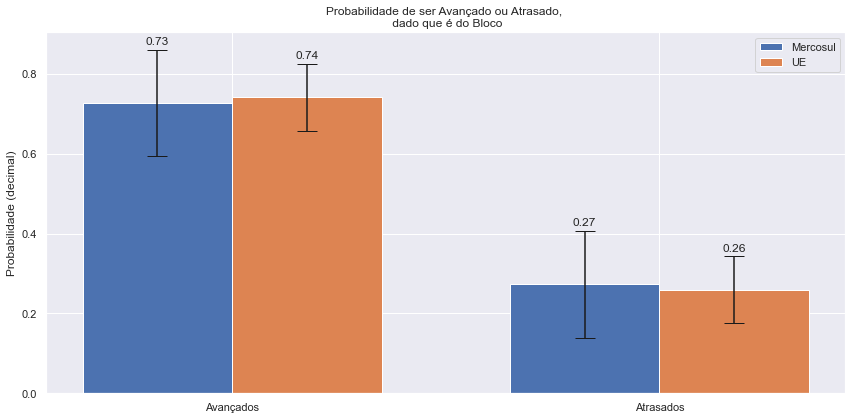

In [67]:
labels = ['Avançados', 'Atrasados']

sns.set_theme()

p_atrasado_dado_mercosul = 1 - p_avancado_dado_mercosul
p_atrasado_dado_eu = 1 - p_avancado_dado_eu

dados_mercosul = [p_avancado_dado_mercosul, p_atrasado_dado_mercosul]
dados_eu = [p_avancado_dado_eu, p_atrasado_dado_eu]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, dados_mercosul, width, label='Mercosul', yerr=[resM.standard_error, resM2.standard_error], capsize=10)
rects2 = ax.bar(x + width/2, dados_eu, width, label='UE', yerr=[resEU.standard_error, resEU2.standard_error], capsize=10)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Probabilidade (decimal)')
ax.set_title('Probabilidade de ser Avançado ou Atrasado, \n dado que é do Bloco')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3, fmt='%.2f')
ax.bar_label(rects2, padding=3, fmt='%.2f')

fig.tight_layout()

plt.show()